### Unit 6: Using Non-Parametric Tests

Kyle P. Rasku MS BSN RN

In this notebook we'll we'll look at **non-parametric** tests we can use instead of t testing and ANOVA, when data isn't normal / Gaussian or continuous in nature.

In [1]:
%matplotlib inline
import matplotlib.pylab
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(12,10))
import pandas as pd
import numpy as np
import datetime
import math

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [3]:
heart = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
heart_backup = heart.copy()
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
for c in categorical_columns:
    heart[c] = pd.Categorical(heart[c])

In [5]:
heart_categorical = heart[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].copy()
heart_continuous = heart[["age", "trestbps", "chol", "thalach", "oldpeak", "ca", "num"]].copy()

In [6]:
heart_categorical.describe()

,sex,cp,fbs,restecg,exang,slope,thal
count,303,303,303,303,303,303,301.0
unique,2,4,2,3,2,3,3.0
top,1,4,0,0,0,1,3.0
freq,206,144,258,151,204,142,166.0


In [7]:
heart_continuous.describe()

,age,trestbps,chol,thalach,oldpeak,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
# Add IQR, variance and range
heart_summary = heart_continuous.describe().transpose()

heart_summary["IQR"] = heart_summary["75%"] - heart_summary["25%"]
heart_summary["range"] = heart_summary["max"] - heart_summary["min"]
heart_summary["var"] = heart_summary["std"]*heart_summary["std"]

heart_summary = heart_summary.transpose()
heart_summary

,age,trestbps,chol,thalach,oldpeak,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000
IQR,13.000000,20.000000,64.000000,32.500000,1.600000,1.000000,2.000000
range,48.000000,106.000000,438.000000,131.000000,6.200000,3.000000,4.000000


In [9]:
#divide data into male vs. female sets

males = heart[heart["sex"]==1].copy()
females = heart[heart["sex"]==0].copy()

males.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [10]:
females.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
11,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
18,48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0,0


In [11]:
print(males.shape)
print(females.shape)

(206, 14)
(97, 14)


We created two groups using males vs. females.

Now, let's create three groups, using patients' ages.

The ages seem to range from late 20s to late 70s, with the majority of patient ages falling between 45 and 65.  

The data is roughly normally distributed.

Based on this and our understanding of life-stages, let's divide the data into ages 0-45, 45-60, and 60+

In [13]:
# Create an age-group field: age < 45: group 1, age 45-59: group 2, age 60+: group 3

heart.loc[heart['age'] < 45, 'age_group'] = 1
heart.loc[(heart['age'] > 44) & (heart['age'] < 60), 'age_group'] = 2
heart.loc[heart['age'] > 59, 'age_group'] = 3
heart['age_group'] = heart['age_group'].astype('Int64')

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,3
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,3
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,1


### More Hypothesis Testing

Review: There must always be a hypothesis to test, for power and statistical significance to matter.

Just as we did in the t test & ANOVA lesson, we must:
1. Calculate power
2. Set the significance level (alpha)
3. State the null and alternative hypotheses
4. Ensure the data meets the test requirements
5. Conduct the correct test

In the prior lecture, we tested to ensure the data met the requirements for parametric testing.  

#### Here we'll look at non-parametric tests, where data does not need to be normally distributed, medians are being compared, or data is categorical rather than continuous in nature.

1. Since we already performed a power calculation for this sample size in the prior notebook, we're going to assume we have sufficient power.

2. We will complete step 2 by setting our significance level (alpha) to 0.05.

3. The 'oldpeak' variable measures ST depression induced by exercise relative to rest.

So:

**H(0), The NULL hypothesis is:** Males and females have equal distribution of ST depression induced by exercise relative to rest.

**H(A), The Alternative hypothesis is:** Males and females have **unequal** distribution of ST depression induced by exercise relative to rest.

Stated thus, we have a *two-tailed* alternative hypothesis, if we wanted a *one-tailed* version, we'd state the alternative hypothesis this way, for example:

**Alternate H(A):** Males have higher median ST depression induced by exercise relative to rest when compared to females.

4. We know the data meets the test requirements because it is NOT normally distributed, see graphs below.

5. So, to compare medians we will use the Mann Whitney U Test to compare median 'oldpeak' for independent samples.

array([<Axes: title={'center': 'oldpeak'}>], dtype=object)

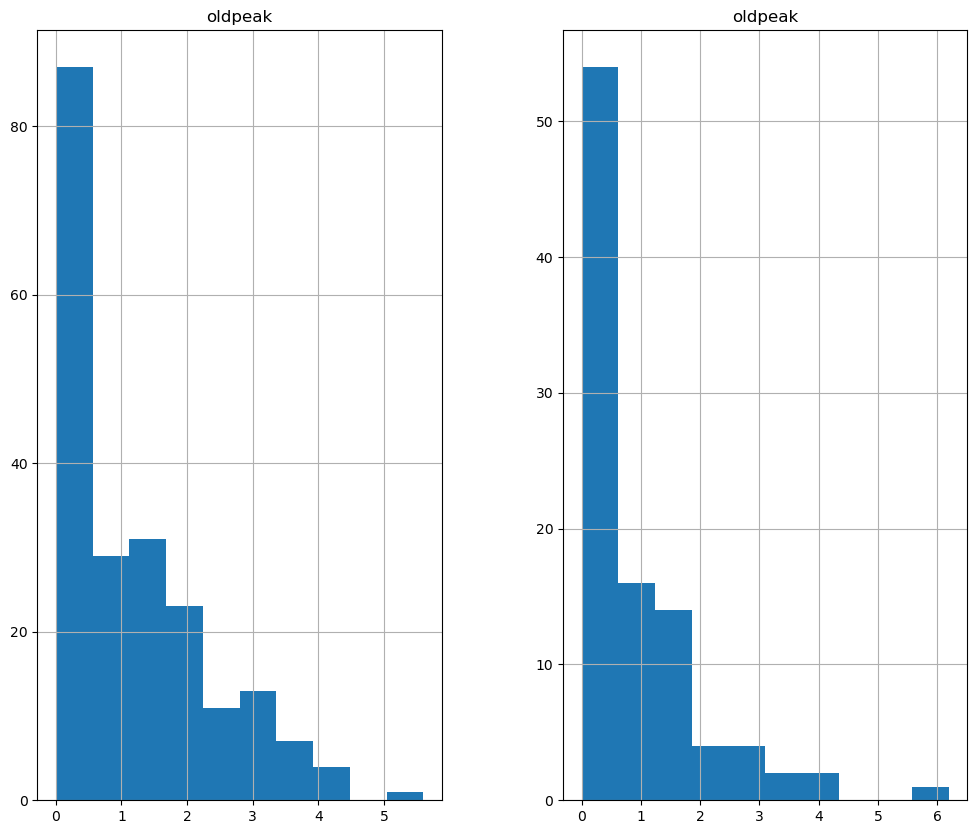

In [15]:
fig, axes = plt.subplots(1, 2)

males.hist('oldpeak', bins=10, ax=axes[0])
females.hist('oldpeak', bins=10, ax=axes[1])

In [16]:
from scipy.stats import mannwhitneyu

males_U, p = mannwhitneyu(males['oldpeak'], females['oldpeak'], method="exact")
print("Males vs. Females: U Statistic:", males_U)

nx, ny = len(males['oldpeak']), len(females['oldpeak'])
females_U = nx*ny - males_U
print("Females vs. Males U Statistic:", females_U)

print("Either sided p-value:", p)

Males vs. Females: U Statistic: 11312.5
Females vs. Males U Statistic: 8669.5
Either sided p-value: 0.06338643575977174


Based on the outcome, Males are more different from females in 'oldpeak' distribution than females are from males.

While the either-sided p-value doesn't indicate statistical significance at the 95% confidence interval (alpha of 0.05), the effect size is large enough and p-value close enough to significance to encourage us to repeat this test with another patient sample.

**In this case, we will FAIL TO REJECT the NULL hypothesis.**

## The Kruskal-Wallis Test

This test allows comparison of outcomes among **more than two groups**.

It has no normality or linearity assumptions (as there are with ANOVA). 

1. Calculate power
2. Set the significance level (alpha)
3. State the null and alternative hypotheses
4. Ensure the data meets the test requirements
5. Conduct the correct test



### Steps

1. We already know we have adequate power between the three age groups.

2. We will use significance level / alpha of 0.05.

3. 

**NULL hypothesis:** The median 'oldpeak' is the same between age groups.

**Alternative hypothesis:** One of the median 'oldpeak' measures is significantly different from the other two age groups.

4. The data are not normally distributed, and we want to compare medians across three groups, so this is correct test to use.

5. We'll conduct the Kruskal-Wallis test to compare median 'oldpeak' levels across age groups.

In [17]:
heart.groupby('age_group').count()['age']

age_group
1     55
2    157
3     91
Name: age, dtype: int64

array([<Axes: title={'center': 'oldpeak'}>], dtype=object)

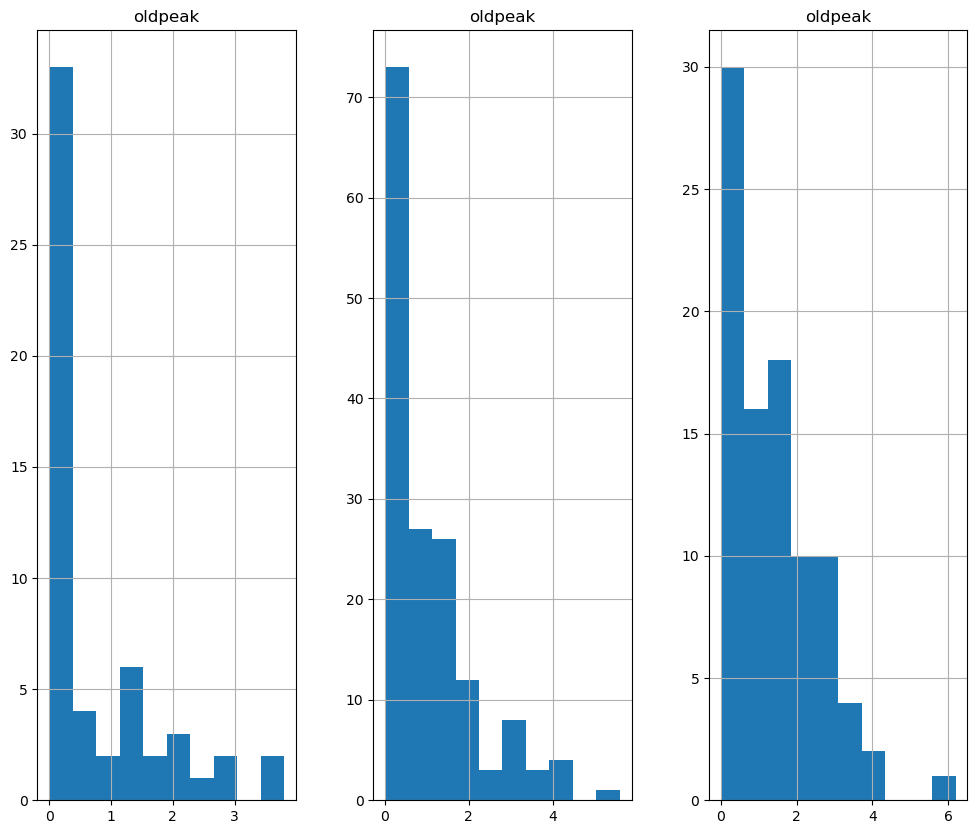

In [18]:
fig, axes = plt.subplots(1, 3)

heart[heart['age_group']==1].hist('oldpeak', bins=10, ax=axes[0])
heart[heart['age_group']==2].hist('oldpeak', bins=10, ax=axes[1])
heart[heart['age_group']==3].hist('oldpeak', bins=10, ax=axes[2])

In [19]:
heart['age_group'] = pd.Categorical(heart['age_group'])

In [20]:
from scipy import stats

stats.kruskal(heart[heart['age_group']==1]['oldpeak'], heart[heart['age_group']==2]['oldpeak'], heart[heart['age_group']==3]['oldpeak'])

KruskalResult(statistic=18.443415285915446, pvalue=9.886970923339835e-05)

This table provides all the information we need in order to FAIL TO REJECT the null hypothesis and conclude that the age group median measures of 'oldpeak' (ST depression induced by exercise relative to rest) are NOT significantly different.
